In [4]:
# Import Libraries

import pandas as pd 
import seaborn as sns
import numpy as np 

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

# read data
df = pd.read_csv(r'C:\Users\Navendra\Documents\movies.csv')

In [5]:
#check the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [6]:
#check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
#check data type of the column 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# apply conditional function to the column containing negative numbers
df['gross'] = df['gross'].apply(lambda x: abs(x) if x < 0 else x)

In [9]:
#changing column data types
df['budget'] = df['budget'].astype('Int64')

df['gross']  = df['gross'].astype('Int64')

In [10]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [11]:
#change the date format on released column 
df['released'] = pd.to_datetime(df['released'].str.extract(r'(\w+ \d+, \d+)', expand=False), format = '%B %d, %Y')

In [12]:
df['yearcorrect'] = df['released'].astype(str).str[:4]
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

       released  score      votes         director                   writer  \
0    1980-06-13    8.4   927000.0  Stanley Kubrick             Stephen King   
1    1980-07-02    5.8    65000.0   Randal Kleiser  Henry De Vere Stacpoole   
2    1980-06-20    8.7  1200000.0   Irvin Kershner           Leigh Brackett   
3    1980-07-02    7.7   221000.0     Jim Abrahams             Jim Abrahams   
4    1980-07-25    7.3   108000.0     Harold Ramis       Brian Doyle-Murray   
...         ...    ...        ...              ...                      ...   
7663 2020-10-23    3.1       18.0    Joseph Ebanks            Joseph Ebanks   
7664 2020-02-07    4.7       36.0     Dusty Dukatz              Lisa Huston   
7665 2020-04-27    5.7       29.0     Nkanya Nkwai             Lynno Lovert   
7666 2020-10-01    NaN        NaN    James Randall            James Randall   
7667 2020-08-19    5.7        7.0     Pereko Mosia             Pereko Mosia   

                  star         country    budget      gross  \
0       Jack Nicholson  United Kingdom  19000000   46998772   
1       Brooke Shields   United States   4500000   58853106   
2          Mark Hamill   United States  18000000  538375067   
3          Robert Hays   United States   3500000   83453539   
4          Chevy Chase   United States   6000000   39846344   
...                ...             ...       ...        ...   
7663      Shannon Bond   United States      7000       <NA>   
7664  Michael Saquella   United States      <NA>       <NA>   
7665      Onyama Laura   United States     58750       <NA>   
7666     Christina Roz   United States     15000       <NA>   
7667  Siyabonga Mabaso    South Africa      <NA>       <NA>   

                        company  runtime yearcorrect  
0                  Warner Bros.    146.0        1980  
1             Columbia Pictures    104.0        1980  
2                     Lucasfilm    124.0        1980  
3            Paramount Pictures     88.0        1980  
4                Orion Pictures     98.0        1980  
...                         ...      ...         ...  
7663                        NaN     90.0        2020  
7664  Cactus Blue Entertainment     90.0        2020  
7665           Embi Productions      NaN        2020  
7666                        NaN    120.0        2020  
7667                PK 65 Films    102.0        2020  

[7668 rows x 16 columns]

In [13]:
df=df.sort_values(by=['gross'], inplace=False, ascending=False)

In [14]:
pd.set_option('display.max_rows', None)

In [15]:
#drop any duplicate
df.drop_duplicates()

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [16]:
#seaborn plot for budget vs gross
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<Axes: xlabel='budget', ylabel='gross'>

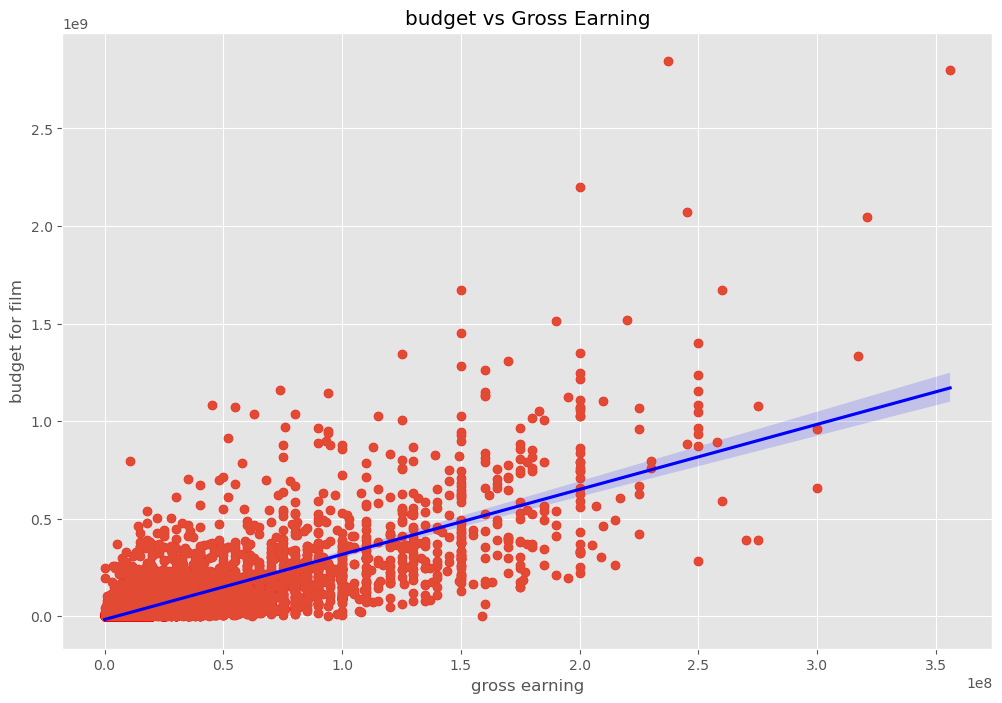

In [17]:
#Scatter plot with budget vs gross to find correlation
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('budget vs Gross Earning')
plt.xlabel('gross earning')
plt.ylabel('budget for film')
plt.show()

In [58]:
df_mean_of_gross = (df.groupby("company").gross
            .agg(["mean"])
            .rename(columns="{}_of_gross".format)
            .sort_values("mean_of_gross", ascending=False))
df_mean_of_gross

mean_of_gross
company                                                             
Marvel Studios                                         1255466034.25
Illumination Entertainment                              1097122396.5
Fairview Entertainment                                   966554929.0
B24                                                      880681519.0
Avi Arad Productions                                     856085151.0
Chris Morgan Productions                                 759056935.0
Jolie Pas                                                758411779.0
Coco Cartoon                                             726264074.0
Lucasfilm                                                718535219.2
Marvel Entertainment                                     714421503.0
Beijing Dengfeng International Culture Communic...       699992512.0
Pixar Animation Studios                             657195377.166667
FortyFour Studios                                        589590788.0
Allison Shearmur Productions                             542358331.0
Syncopy                                                  527016307.0
Twentieth Century Fox Animation                     473371456.428571
Color Force                                              470604142.0
Blue Sky Studios                                        470160438.75
Hasbro                                                   467989645.0
Beijing Diqi Yinxiang Entertainment                      461421559.0
Marvel Enterprises                                       444081020.5
Warner Bros. Pictures                                    436188866.0
C-2 Pictures                                             433371112.0
DreamWorks Animation                                424057602.071429
Kasdan Pictures                                          411006740.0
Walt Disney Animation Studios                       397147591.235294
Roth Films                                               396592829.0
Centropolis Film Productions                             379014294.0
Heyday Films                                            373802302.25
The Halcyon Company                                      371353001.0
Atomic Monster                                           365551694.0
Amuse                                                    358180115.0
Temple Hill Entertainment                                356922985.5
Tokuma Shoten                                            355475245.0
The Mark Gordon Company                                  350448145.0
Lucamar Productions                                      349546142.0
Legendary East                                           334933831.0
Dentsu                                                   334578975.5
Rimfire Films                                            328203506.0
Cecchi Gori Pictures                                     327333559.0
Mandeville Films                                         326721329.8
Gotham Group                                             300235695.5
Walt Disney Pictures                                295348681.235772
LivePlanet                                               287553595.0
Bullwinkle Studios                                       275698039.0
Strong Heart/Demme Production                            272742922.0
Matten Productions                                       269958228.0
China Film Group Corporation (CFGC)                      263317855.0
Everyman Pictures                                        262552893.0
Danjaq                                                   258999707.5
Perfect World Pictures                                   256270098.5
Monkeypaw Productions                                    255184580.0
Haxan Films                                              248639099.0
Alibaba Pictures                                         244410446.5
Kopelson Entertainment                                   242295562.0
Beijing Enlight Pictures                                 240663149.0
Constantin Film International                        

In [54]:
df_mean_of_budget = (df.groupby("company").budget
            .agg(["mean"])
            .rename(columns="{}_of_budget".format)
            .sort_values("mean_of_budget", ascending=False))
df_mean_of_budget

mean_of_budget
company                                                             
B24                                                      245000000.0
Marvel Studios                                           222000000.0
Chris Morgan Productions                                 200000000.0
The Halcyon Company                                      200000000.0
C-2 Pictures                                             200000000.0
Jolie Pas                                                180000000.0
Fairview Entertainment                                   175000000.0
FortyFour Studios                                        172500000.0
Marvel Entertainment                                     170000000.0
Roth Films                                               170000000.0
Blue Tulip Productions                                   160000000.0
Legendary East                                           150000000.0
Pixar Animation Studios                             146333333.333333
Bullwinkle Studios                                       145000000.0
Pyramania                                                140000000.0
Marvel Enterprises                                       139000000.0
Skydance Media                                           138000000.0
Chris Lee Productions                                    137000000.0
Hasbro                                                   135000000.0
20th Century Studios                                     135000000.0
Lucamar Productions                                      130000000.0
Centropolis Film Productions                             130000000.0
Total Recall                                             125000000.0
Walt Disney Animation Studios                       122705882.352941
DreamWorks Animation                                119428571.428571
Lucasfilm                                                114900000.0
Village Roadshow Pictures                           106666666.666667
Heyday Films                                             104650000.0
Hollywood Licensing Group                                102000000.0
Cloud Atlas Productions                                  102000000.0
Syncopy                                                  100000000.0
First Light Production                                   100000000.0
Kopelson Entertainment                                   100000000.0
Avi Arad Productions                                     100000000.0
Legend3D                                                 100000000.0
Red Granite Pictures                                     100000000.0
Media Rights Capital (MRC)                               100000000.0
Blue Sky Studios                                          99000000.0
Beckner/Gorman Productions                                98000000.0
Walt Disney Pictures                                 97240186.915888
Peters Entertainment                                      95750000.0
Beijing Skywheel Entertainment Co.                        95000000.0
Allison Shearmur Productions                              95000000.0
Beijing New Picture Film                                  94000000.0
Legendary Entertainment                                   91000000.0
Twentieth Century Fox Animation                           91000000.0
Jerry Bruckheimer Films                                   90000000.0
Hammerhead Productions                                    90000000.0
Forward Pass                                              90000000.0
Tribeca Productions                                       87000000.0
Hurwitz Creative                                          86500000.0
Atlas Entertainment                                       85000000.0
China Film Group Corporation (CFGC)                       85000000.0
Cruella Productions                                       85000000.0
Material                                                  85000000.0
Clubhouse Pictures (II)                                   84500000.0
Danjaq                                              

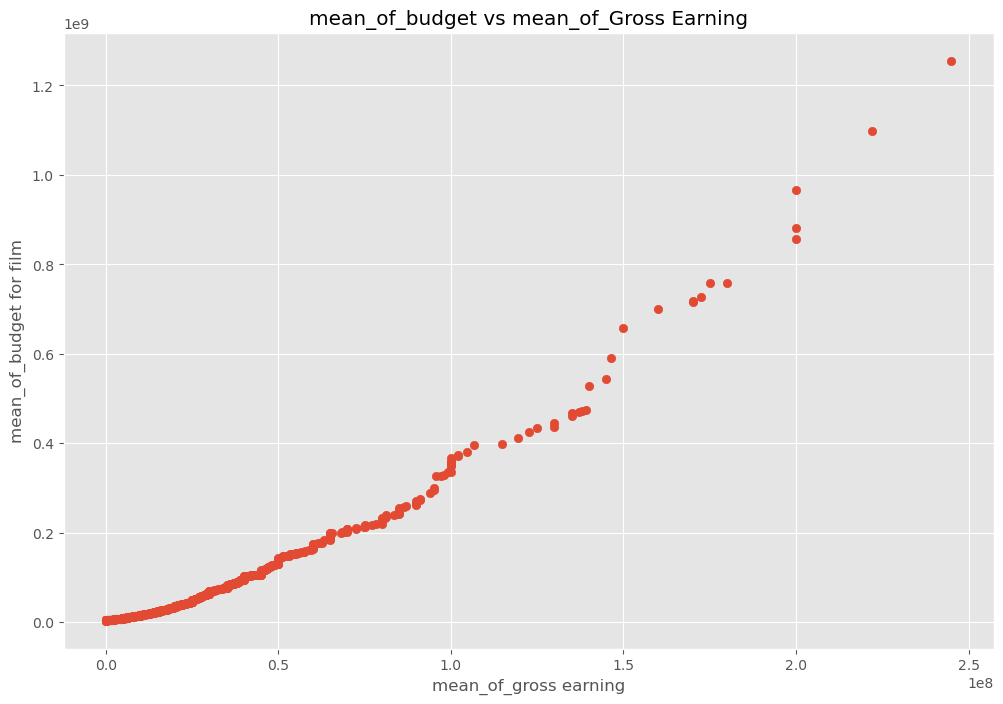

In [62]:
#Scatter plot with mean of both budget and gross to find correlation
plt.scatter(x=df_mean_of_budget['mean_of_budget'], y=df_mean_of_gross['mean_of_gross'])
plt.title('mean_of_budget vs mean_of_Gross Earning')
plt.xlabel('mean_of_gross earning')
plt.ylabel('mean_of_budget for film')
plt.show()

In [18]:
#check for correlation
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = df.corr(method = 'pearson',numeric_only = True)
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000


In [19]:
#high correlation between budget and gross

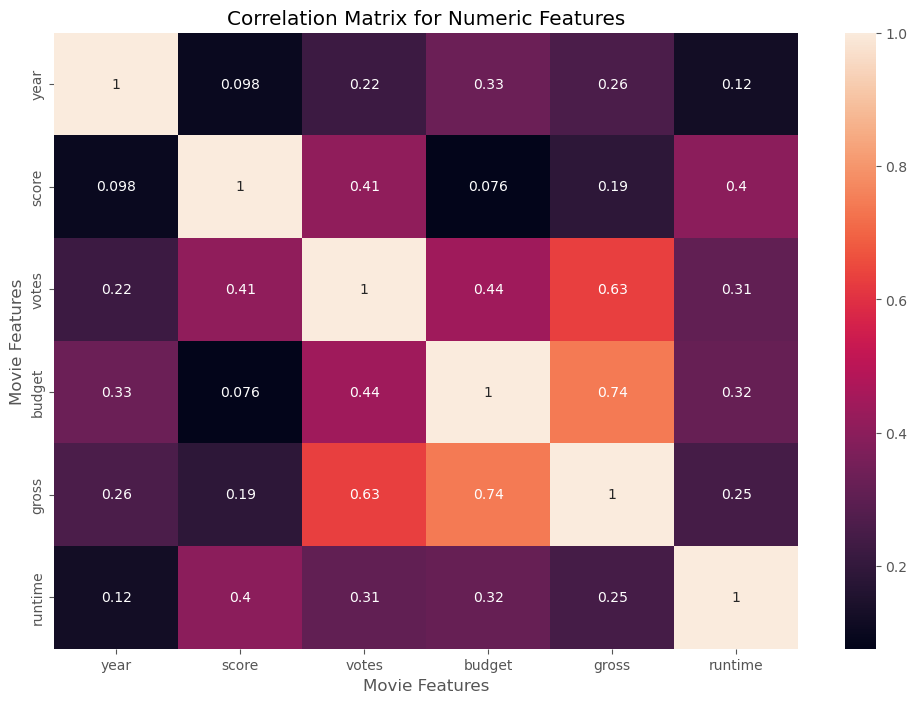

In [20]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [21]:
#look at company 
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

       released  score      votes       director              writer  \
5445 2009-12-18    7.8  1100000.0  James Cameron       James Cameron   
7445 2019-04-26    8.4   903000.0  Anthony Russo  Christopher Markus   
3045 1997-12-19    7.8  1100000.0  James Cameron       James Cameron   
6663 2015-12-18    7.8   876000.0    J.J. Abrams     Lawrence Kasdan   
7244 2018-04-27    8.4   897000.0  Anthony Russo  Christopher Markus   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   

                    company  runtime yearcorrect  
5445  Twentieth Century Fox    162.0        2009  
7445         Marvel Studios    181.0        2019  
3045  Twentieth Century Fox    194.0        1997  
6663              Lucasfilm    138.0        2015  
7244         Marvel Studios    149.0        2018

In [22]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

name  rating  genre  year   released  score      votes  director  \
5445   533       5      0  2009 2009-12-18    7.8  1100000.0      1155   
7445   535       5      0  2019 2019-04-26    8.4   903000.0       162   
3045  6896       5      6  1997 1997-12-19    7.8  1100000.0      1155   
6663  5144       5      0  2015 2015-12-18    7.8   876000.0      1125   
7244   536       5      0  2018 2018-04-27    8.4   897000.0       162   

      writer  star  country     budget       gross  company  runtime  \
5445    1778  2334       55  237000000  2847246203     2253    162.0   
7445     743  2241       55  356000000  2797501328     1606    181.0   
3045    1778  1595       55  200000000  2201647264     2253    194.0   
6663    2550   524       55  245000000  2069521700     1540    138.0   
7244     743  2241       55  321000000  2048359754     1606    149.0   

      yearcorrect  
5445           29  
7445           39  
3045           17  
6663           35  
7244           38

In [23]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

       released  score      votes       director              writer  \
5445 2009-12-18    7.8  1100000.0  James Cameron       James Cameron   
7445 2019-04-26    8.4   903000.0  Anthony Russo  Christopher Markus   
3045 1997-12-19    7.8  1100000.0  James Cameron       James Cameron   
6663 2015-12-18    7.8   876000.0    J.J. Abrams     Lawrence Kasdan   
7244 2018-04-27    8.4   897000.0  Anthony Russo  Christopher Markus   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   

                    company  runtime yearcorrect  
5445  Twentieth Century Fox    162.0        2009  
7445         Marvel Studios    181.0        2019  
3045  Twentieth Century Fox    194.0        1997  
6663              Lucasfilm    138.0        2015  
7244         Marvel Studios    149.0        2018

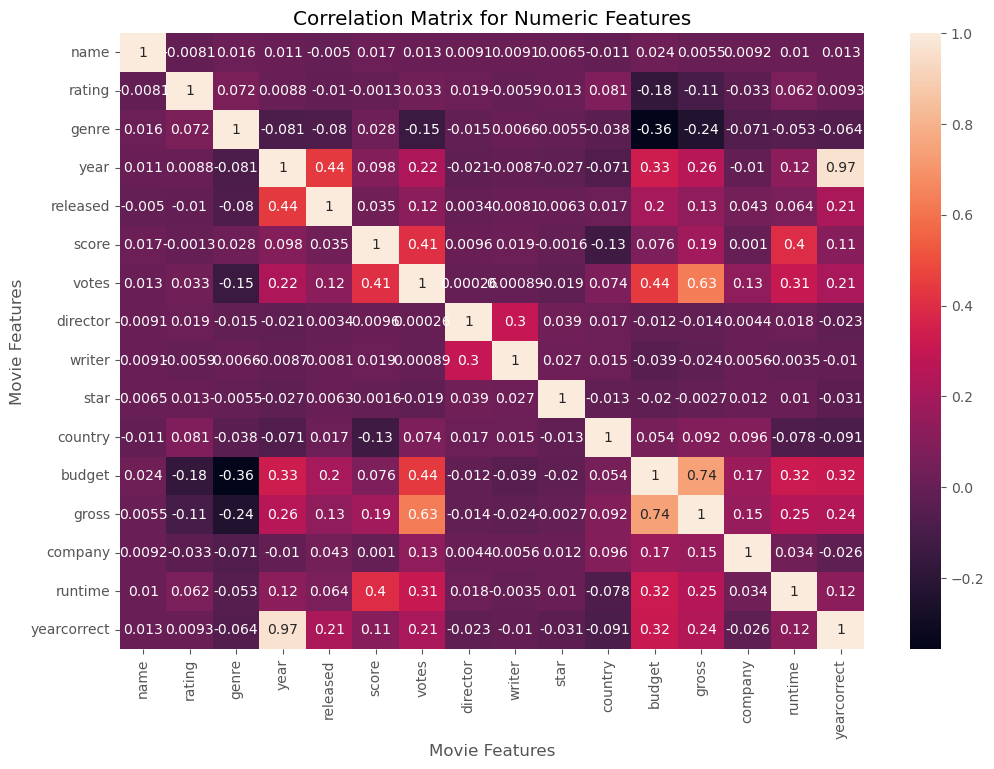

In [24]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [25]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.004951  0.017097   
rating      -0.008069  1.000000  0.072423  0.008779 -0.010258 -0.001314   
genre        0.016355  0.072423  1.000000 -0.081261 -0.080051  0.027965   
year         0.011453  0.008779 -0.081261  1.000000  0.438382  0.097995   
released    -0.004951 -0.010258 -0.080051  0.438382  1.000000  0.035082   
score        0.017097 -0.001314  0.027965  0.097995  0.035082  1.000000   
votes        0.013088  0.033225 -0.145307  0.222945  0.118998  0.409182   
director     0.009079  0.019483 -0.015258 -0.020795  0.003426  0.009559   
writer       0.009081 -0.005921  0.006567 -0.008656  0.008115  0.019416   
star         0.006472  0.013405 -0.005477 -0.027242  0.006276 -0.001609   
country     -0.010737  0.081244 -0.037615 -0.070938  0.016837 -0.133348   
budget       0.023970 -0.176002 -0.356564  0.329321  0.201514  0.076254   
gross        0.005533 -0.107339 -0.235650  0.257486  0.132305  0.186258   
company      0.009211 -0.032943 -0.071067 -0.010431  0.042653  0.001030   
runtime      0.010392  0.062145 -0.052711  0.120811  0.063762  0.399451   
yearcorrect  0.012835  0.009280 -0.063573  0.967486  0.214269  0.107219   

                votes  director    writer      star   country    budget  \
name         0.013088  0.009079  0.009081  0.006472 -0.010737  0.023970   
rating       0.033225  0.019483 -0.005921  0.013405  0.081244 -0.176002   
genre       -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.356564   
year         0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.329321   
released     0.118998  0.003426  0.008115  0.006276  0.016837  0.201514   
score        0.409182  0.009559  0.019416 -0.001609 -0.133348  0.076254   
votes        1.000000  0.000260  0.000892 -0.019282  0.073625  0.442429   
director     0.000260  1.000000  0.299067  0.039234  0.017490 -0.012272   
writer       0.000892  0.299067  1.000000  0.027245  0.015343 -0.039451   
star        -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019589   
country      0.073625  0.017490  0.015343 -0.012998  1.000000  0.054063   
budget       0.442429 -0.012272 -0.039451 -0.019589  0.054063  1.000000   
gross        0.630757 -0.014441 -0.023519 -0.002717  0.092129  0.740395   
company      0.133204  0.004404  0.005646  0.012442  0.095548  0.173214   
runtime      0.309212  0.017624 -0.003511  0.010174 -0.078412  0.320447   
yearcorrect  0.206475 -0.022579 -0.010063 -0.031166 -0.090962  0.315348   

                gross   company   runtime  yearcorrect  
name         0.005533  0.009211  0.010392     0.012835  
rating      -0.107339 -0.032943  0.062145     0.009280  
genre       -0.235650 -0.071067 -0.052711    -0.063573  
year         0.257486 -0.010431  0.120811     0.967486  
released     0.132305  0.042653  0.063762     0.214269  
score        0.186258  0.001030  0.399451     0.107219  
votes        0.630757  0.133204  0.309212     0.206475  
director    -0.014441  0.004404  0.017624    -0.022579  
writer      -0.023519  0.005646 -0.003511    -0.010063  
star        -0.002717  0.012442  0.010174    -0.031166  
country      0.092129  0.095548 -0.078412    -0.090962  
budget       0.740395  0.173214  0.320447     0.315348  
gross        1.000000  0.154840  0.245216     0.240651  
company      0.154840  1.000000  0.034402    -0.026492  
runtime      0.245216  0.034402  1.000000     0.115317  
yearcorrect  0.240651 -0.026492  0.115317     1.000000

In [26]:
correlation_mat = df_numerized.corr(method='pearson',numeric_only = False)

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.004951
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.023970
             gross          0.005533
             company        0.009211
             runtime        0.010392
             yearcorrect    0.012835
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released      -0.010258
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [27]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.356564
budget       genre         -0.356564
gross        genre         -0.235650
genre        gross         -0.235650
rating       budget        -0.176002
budget       rating        -0.176002
votes        genre         -0.145307
genre        votes         -0.145307
score        country       -0.133348
country      score         -0.133348
gross        rating        -0.107339
rating       gross         -0.107339
yearcorrect  country       -0.090962
country      yearcorrect   -0.090962
genre        year          -0.081261
year         genre         -0.081261
genre        released      -0.080051
released     genre         -0.080051
country      runtime       -0.078412
runtime      country       -0.078412
company      genre         -0.071067
genre        company       -0.071067
country      year          -0.070938
year         country       -0.070938
yearcorrect  genre         -0.063573
genre        yearcorrect   -0.063573
             runtime       -0.052711
r

In [28]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr

gross        votes          0.630757
votes        gross          0.630757
gross        budget         0.740395
budget       gross          0.740395
year         yearcorrect    0.967486
yearcorrect  year           0.967486
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [29]:
# Votes and budget have the highest correlation to gross earning